In [1]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

In [2]:
car_data = pd.read_csv('car_data.csv')

In [3]:
car_data.head()

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
car_data.shape

(11914, 16)

In [5]:
#Inspect every column for missing values
car_data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine_Fuel_Type        3
Engine_HP              69
Engine_Cylinders       30
Transmission_Type       0
Driven_Wheels           0
Number_of_Doors         6
Market_Category      3742
Vehicle_Size            0
Vehicle_Style           0
highway_MPG             0
city_mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [6]:
#Populate the missing values for Engine Fuel Type with default values
car_data.Engine_Fuel_Type = car_data.Engine_Fuel_Type.fillna('NA')

In [7]:
#Populate the missing values for Number_of_Doors with default values
car_data.Number_of_Doors = car_data.Number_of_Doors.fillna('NA')

In [8]:
#Populate the missing values for Engine_HP with default values
car_data.Engine_HP = car_data.Engine_HP.fillna('NA')

In [9]:
car_data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine_Fuel_Type        0
Engine_HP               0
Engine_Cylinders       30
Transmission_Type       0
Driven_Wheels           0
Number_of_Doors         0
Market_Category      3742
Vehicle_Size            0
Vehicle_Style           0
highway_MPG             0
city_mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [10]:
#Drop the values present in Market category
car_data.dropna(inplace = True)

In [11]:
car_data.isnull().sum()

Make                 0
Model                0
Year                 0
Engine_Fuel_Type     0
Engine_HP            0
Engine_Cylinders     0
Transmission_Type    0
Driven_Wheels        0
Number_of_Doors      0
Market_Category      0
Vehicle_Size         0
Vehicle_Style        0
highway_MPG          0
city_mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [12]:
#Display the datatype for the data in every column
car_data.dtypes

Make                  object
Model                 object
Year                   int64
Engine_Fuel_Type      object
Engine_HP             object
Engine_Cylinders     float64
Transmission_Type     object
Driven_Wheels         object
Number_of_Doors       object
Market_Category       object
Vehicle_Size          object
Vehicle_Style         object
highway_MPG            int64
city_mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [13]:
#Convert string values into interger placeholders
from sklearn.preprocessing import LabelEncoder


In [14]:
encoder = LabelEncoder()
car_data.Make = encoder.fit_transform(car_data.Make)
car_data.Model = encoder.fit_transform(car_data.Model)
car_data.Engine_Fuel_Type = encoder.fit_transform(car_data.Engine_Fuel_Type)
car_data.Transmission_Type = encoder.fit_transform(car_data.Transmission_Type)
car_data.Engine_Cylinders = encoder.fit_transform(car_data.Engine_Cylinders)

In [15]:
car_data.dtypes

Make                  int64
Model                 int64
Year                  int64
Engine_Fuel_Type      int64
Engine_HP            object
Engine_Cylinders      int64
Transmission_Type     int64
Driven_Wheels        object
Number_of_Doors      object
Market_Category      object
Vehicle_Size         object
Vehicle_Style        object
highway_MPG           int64
city_mpg              int64
Popularity            int64
MSRP                  int64
dtype: object

In [16]:
#Run a correlation between columns
car_data.corr()

,Make,Model,Year,Engine_Fuel_Type,Engine_Cylinders,Transmission_Type,highway_MPG,city_mpg,Popularity,MSRP
Make,1.000000,0.021998,-0.070247,0.094118,-0.302807,0.074692,0.136635,0.161756,-0.315541,-0.112313
Model,0.021998,1.000000,0.116916,-0.015035,0.046578,-0.103736,-0.066276,-0.009924,-0.119435,-0.024598
Year,-0.070247,0.116916,1.000000,-0.209751,-0.053726,-0.294554,0.200202,0.158726,0.118650,0.133504
Engine_Fuel_Type,0.094118,-0.015035,-0.209751,1.000000,-0.065123,0.086708,-0.149315,-0.146010,-0.084064,-0.049812
Engine_Cylinders,-0.302807,0.046578,-0.053726,-0.065123,1.000000,-0.148149,-0.606725,-0.585316,0.030795,0.491149
Transmission_Type,0.074692,-0.103736,-0.294554,0.086708,-0.148149,1.000000,0.069415,0.053882,-0.011469,-0.140660
highway_MPG,0.136635,-0.066276,0.200202,-0.149315,-0.606725,0.069415,1.000000,0.872781,0.037596,-0.212645
city_mpg,0.161756,-0.009924,0.158726,-0.146010,-0.585316,0.053882,0.872781,1.000000,0.041518,-0.201769
Popularity,-0.315541,-0.119435,0.118650,-0.084064,0.030795,-0.011469,0.037596,0.041518,1.000000,-0.052728
MSRP,-0.112313,-0.024598,0.133504,-0.049812,0.491149,-0.140660,-0.212645,-0.201769,-0.052728,1.000000


In [17]:
#Define input and output variable
Input=car_data.drop(['MSRP','Engine_HP','Driven_Wheels','Number_of_Doors','Market_Category','Vehicle_Size','Vehicle_Style','highway_MPG','city_mpg','Popularity'], axis='columns')
Result=car_data['MSRP'].values

In [18]:
#Split the data into training and testing
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(Input, Result,test_size=0.3, random_state=1)
print(X_train)

       Make  Model  Year  Engine_Fuel_Type  Engine_Cylinders  \
7598     18    486  2015                 8                 4   
7955     20    510  2016                 6                 5   
5319     31    308  2016                 7                 4   
5105     20    293  2011                 6                 4   
3217      8    153  2014                 7                 5   
...     ...    ...   ...               ...               ...   
11642    40    717  2012                 8                 2   
7352     32    475  2015                 8                 2   
5680     36    324  2004                 7                 5   
262      33     21  2007                 8                 4   
7308     11    470  1990                 8                 2   

       Transmission_Type  
7598                   1  
7955                   1  
5319                   1  
5105                   3  
3217                   3  
...                  ...  
11642                  1  
7352           

In [20]:
#use decision tree classifier and graphviz to model the decision tree
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [21]:
tree_model = DecisionTreeRegressor(max_depth=4, random_state=1)
tree_model

DecisionTreeRegressor(max_depth=4, random_state=1)

In [22]:
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=1)

In [23]:
print("The coefficient of determination is %.10f" % tree_model.score(Input, Result))

The coefficient of determination is 0.7182474508


In [24]:
tree_model.predict(Input)

array([44195.46958378, 44195.46958378, 44195.46958378, ...,
       44195.46958378, 44195.46958378, 44195.46958378])

In [25]:
export_graphviz(tree_model, out_file="decision_tree.dot", feature_names=X_train.columns, impurity=False, filled=True)

In [26]:
#to generate the decision tree
from sklearn import tree

[Text(0.5648148148148148, 0.9, 'Engine_Cylinders <= 5.5\nsamples = 5699\nvalue = 50490.275'),
 Text(0.2962962962962963, 0.7, 'Engine_Cylinders <= 4.5\nsamples = 5478\nvalue = 41164.521'),
 Text(0.14814814814814814, 0.5, 'Year <= 2000.5\nsamples = 4400\nvalue = 33613.36'),
 Text(0.07407407407407407, 0.3, 'Model <= 618.5\nsamples = 398\nvalue = 2683.487'),
 Text(0.037037037037037035, 0.1, 'samples = 378\nvalue = 2431.066'),
 Text(0.1111111111111111, 0.1, 'samples = 20\nvalue = 7454.25'),
 Text(0.2222222222222222, 0.3, 'Engine_Cylinders <= 3.5\nsamples = 4002\nvalue = 36689.344'),
 Text(0.18518518518518517, 0.1, 'samples = 2128\nvalue = 30079.157'),
 Text(0.25925925925925924, 0.1, 'samples = 1874\nvalue = 44195.47'),
 Text(0.4444444444444444, 0.5, 'Transmission_Type <= 0.5\nsamples = 1078\nvalue = 71985.584'),
 Text(0.37037037037037035, 0.3, 'Make <= 8.5\nsamples = 75\nvalue = 156103.667'),
 Text(0.3333333333333333, 0.1, 'samples = 32\nvalue = 108252.188'),
 Text(0.4074074074074074, 0.1, 

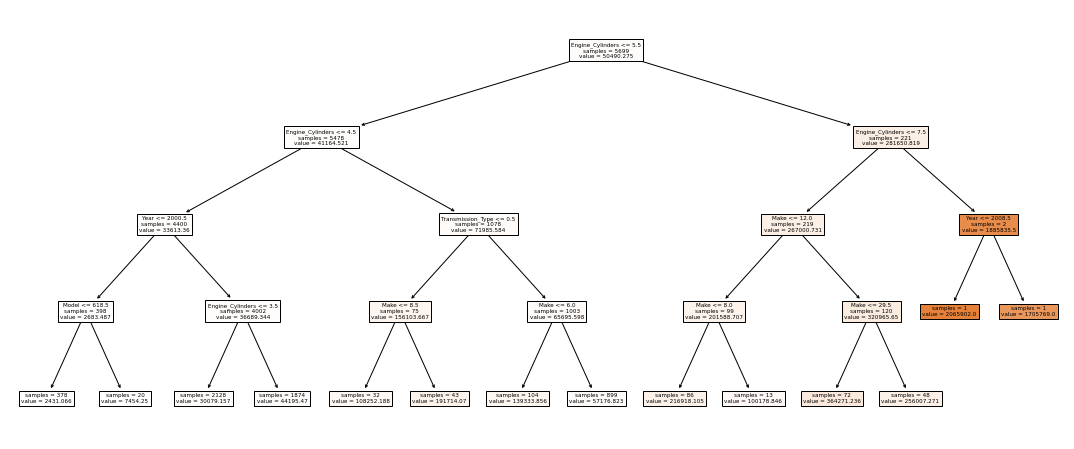

In [27]:
fig = plt.figure(figsize=(19, 8))
tree.plot_tree(tree_model, feature_names=X_train.columns, impurity=False, filled=True)

In [28]:
fig.savefig("assignment2_decision_tree2.png")

Text(0, 0.5, 'MSRP')

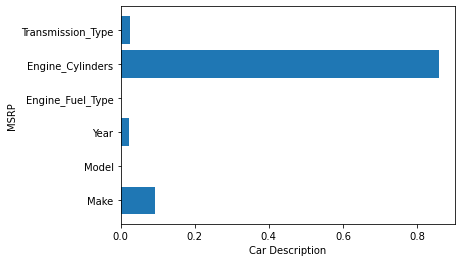

In [29]:
#plot the bar graph for the decision tree
n_features = X_train.shape[1]
plt.barh(range(n_features), tree_model.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Car Description")
plt.ylabel("MSRP")